In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

* CustomerID - unikalny identyfikator klienta
    * Profit - jaką profitowość przynosi klient, wartość bez jednostki, im wyższa wartość tym lepiej
    * Recency - ile dni temu było ostatnie zamówienie klientaa, ilość w dniach, im niższa wartość tym lepiej
    * Frequency	 - jak często klient zamawiał produkty, wartość bez jednostki, im wyższa wartość tym lepiej
    * Monetary	- całkowita wartość zamówionych produktów przez klienta, jednostka PLN, im wyższa wartość tym lepiej
    * Variance - ilość różnorodnych produktów, które zostały zamówione przez klienta, wartość bez jednostki, im wyższa wartość tym lepiej

In [2]:
df = pd.read_csv('Customers.csv',sep=';',decimal =',',index_col='CustomerId')
dftest = pd.read_csv('Customers.csv',sep=';',decimal =',',index_col='CustomerId')

In [3]:
df.head()

,Profit,Recency,Frequency,Monetary,Variance
CustomerId,,,,,
1,187,63,1,2349.06,2
2,96,10,6,922.62,4
3,47,35,4,881.22,3
4,294,5,1,3815.16,2
5,732,4,31,41868.11,29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 1 to 1511
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Profit     1511 non-null   int64  
 1   Recency    1511 non-null   int64  
 2   Frequency  1511 non-null   int64  
 3   Monetary   1511 non-null   float64
 4   Variance   1511 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 70.8 KB


<AxesSubplot:>

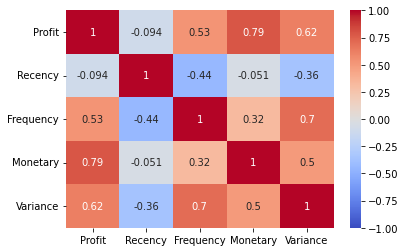

In [5]:
sns.heatmap(df.corr(), cmap= 'coolwarm', vmin=-1,vmax=1,annot=True)

<AxesSubplot:>

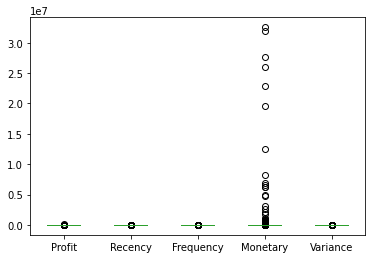

In [6]:
df.plot.box()

#### Trzeba przeprowadzić standaryzacje zmiennych 

In [7]:
import sklearn 
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df)

StandardScaler()

In [10]:
scaled_features = scaler.transform(df)

In [11]:
scaled_features

array([[-0.167781  ,  2.47579923, -0.93859708, -0.0966388 , -0.82905734],
       [-0.18446029, -0.30700772, -0.45528868, -0.09743547, -0.71605336],
       [-0.19344144,  1.00563707, -0.64861204, -0.09745859, -0.77255535],
       ...,
       [ 0.0807587 , -0.62204247,  0.60798982, -0.03679592,  2.1090462 ],
       [-0.07961906, -0.77955985, -0.74527372, -0.07024758,  0.01847252],
       [-0.18702633,  1.00563707, -0.64861204, -0.09736568, -0.60304938]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,Profit,Recency,Frequency,Monetary,Variance
0,-0.167781,2.475799,-0.938597,-0.096639,-0.829057
1,-0.184460,-0.307008,-0.455289,-0.097435,-0.716053
2,-0.193441,1.005637,-0.648612,-0.097459,-0.772555
3,-0.148169,-0.569537,-0.938597,-0.095820,-0.829057
4,-0.067889,-0.622042,1.961253,-0.074567,0.696496


<AxesSubplot:>

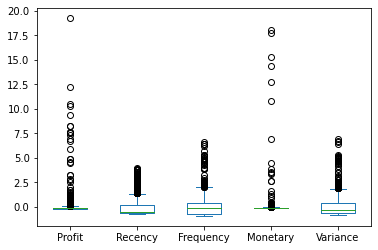

In [13]:
df_feat.plot.box()

Nawet po standaryzacji zmiennych widać dość spore problemy z wartościami odstającymi.
Cecha' 'Profit' i 'Monetery', mają widoczne wartości odstające, lecz usuniecię ich byłoby błędem, gdyż
są to bardzo ważni kienci, na których firma najwiecej zarabia, usuniecie nich mogłoby spowodować błędne wyniki.

In [14]:
df_feat 

,Profit,Recency,Frequency,Monetary,Variance
0,-0.167781,2.475799,-0.938597,-0.096639,-0.829057
1,-0.184460,-0.307008,-0.455289,-0.097435,-0.716053
2,-0.193441,1.005637,-0.648612,-0.097459,-0.772555
3,-0.148169,-0.569537,-0.938597,-0.095820,-0.829057
4,-0.067889,-0.622042,1.961253,-0.074567,0.696496
...,...,...,...,...,...
1506,-0.170164,0.113039,-0.745274,-0.089127,0.018473
1507,-0.179328,0.638097,0.124681,-0.096456,-0.546547
1508,0.080759,-0.622042,0.607990,-0.036796,2.109046
1509,-0.079619,-0.779560,-0.745274,-0.070248,0.018473


In [15]:
#Posłużę się grupowaniem hierarchicznym rysując dendrogram, aby dowiedzieć się na ile części podzielić zbiór.

In [16]:
import scipy.cluster.hierarchy as sch


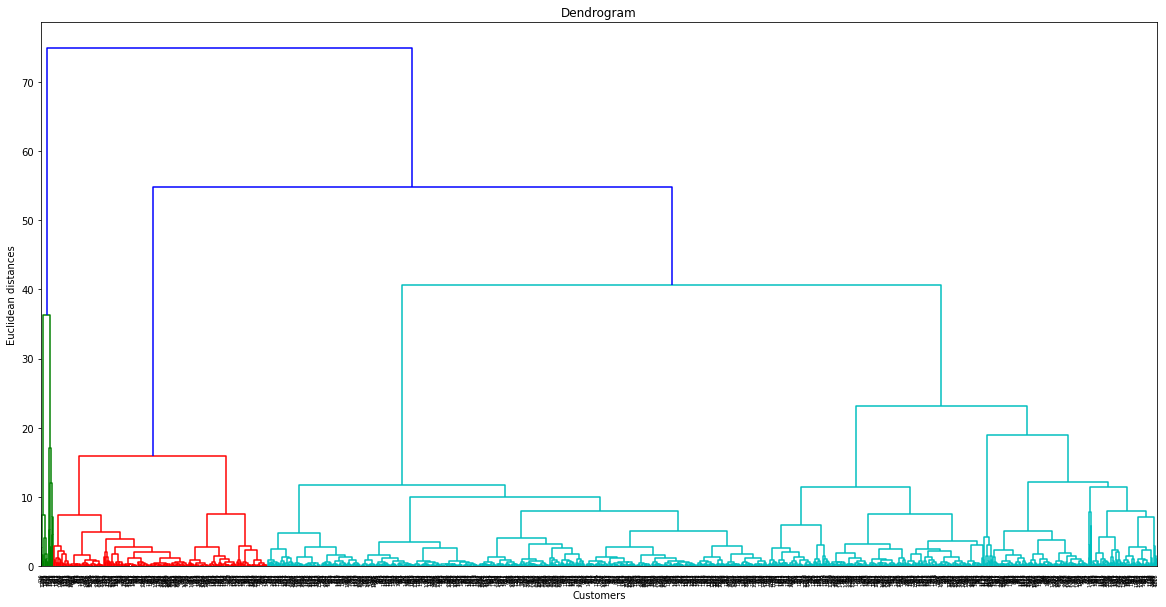

In [17]:
plt.figure(figsize=(20,10))

dendrogram = sch.dendrogram(sch.linkage(df_feat, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# można zaobserwować 5 znaczących podziałów.

In [19]:
from sklearn.cluster import KMeans

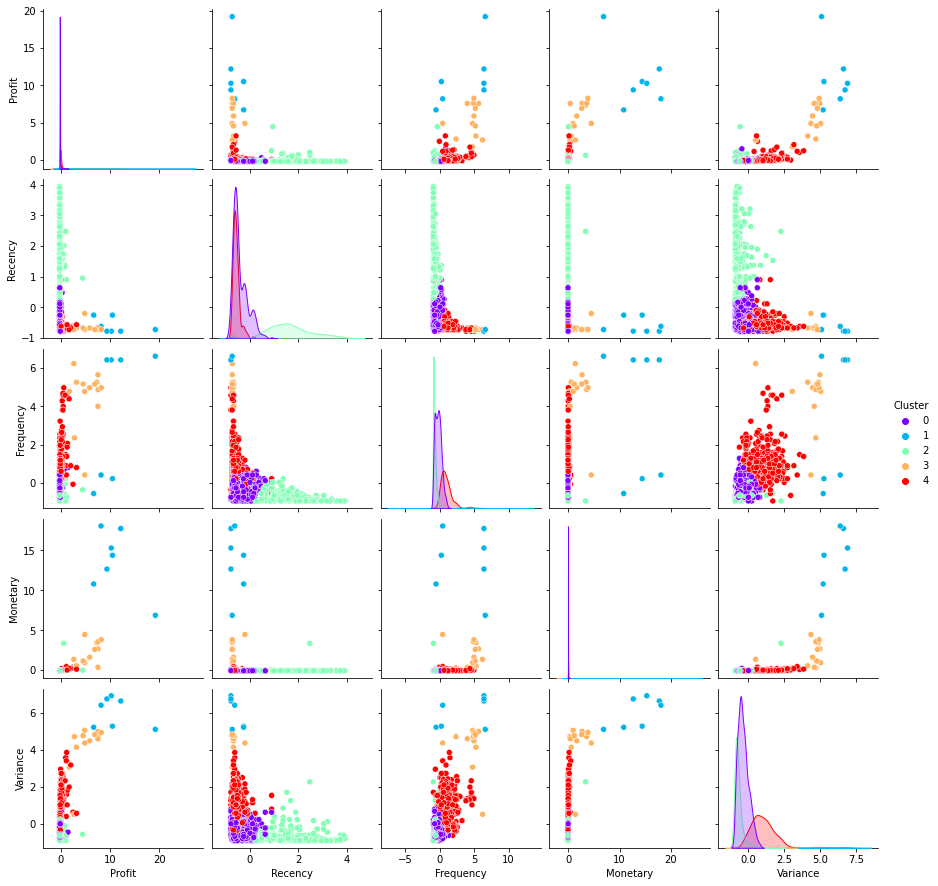

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans
kmeans.fit(df_feat)
y_predicted = kmeans.predict(df_feat)
df_feat['Cluster'] = y_predicted
sns.pairplot(df_feat,hue='Cluster',palette='rainbow')

In [21]:
kmeans.fit(df_feat)

KMeans(n_clusters=3)

In [22]:
y_predicted = kmeans.predict(df_feat)

In [23]:
y_predicted

array([0, 1, 0, ..., 1, 1, 0])

In [24]:
df_feat['Cluster'] = y_predicted
df_feat.head()

,Profit,Recency,Frequency,Monetary,Variance,Cluster
0,-0.167781,2.475799,-0.938597,-0.096639,-0.829057,0
1,-0.184460,-0.307008,-0.455289,-0.097435,-0.716053,1
2,-0.193441,1.005637,-0.648612,-0.097459,-0.772555,0
3,-0.148169,-0.569537,-0.938597,-0.095820,-0.829057,1
4,-0.067889,-0.622042,1.961253,-0.074567,0.696496,1


In [25]:
dftest['Cluster'] = y_predicted

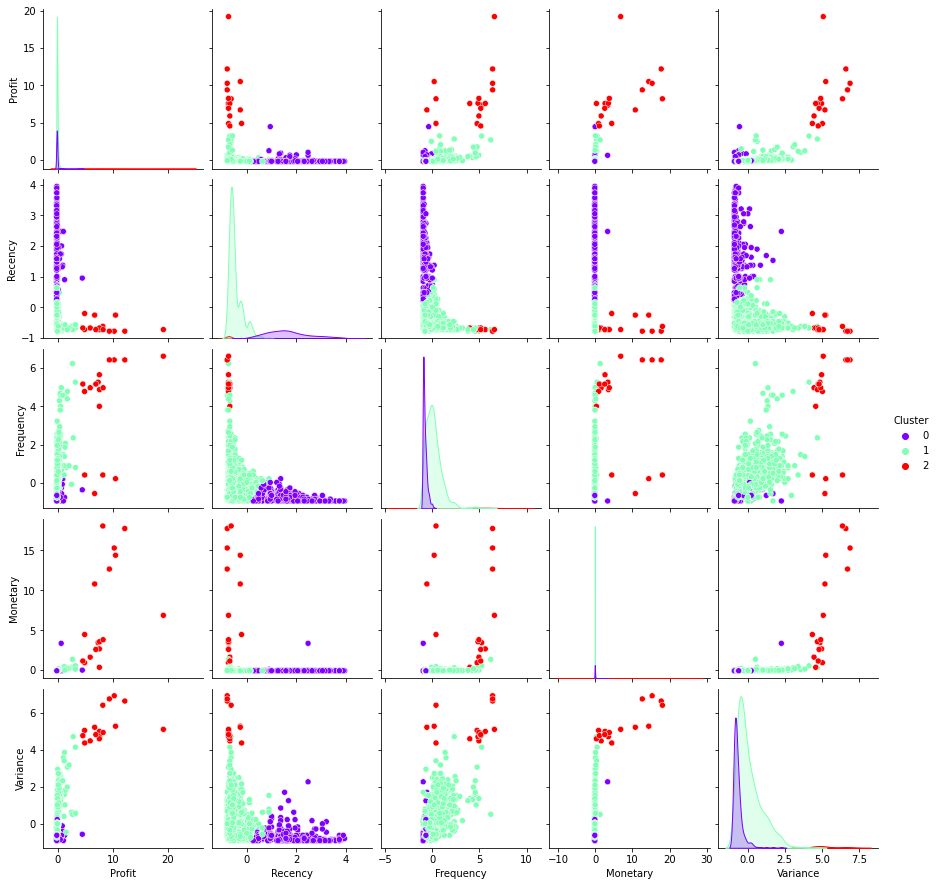

In [26]:
sns.pairplot(df_feat,hue='Cluster',palette='rainbow')

In [29]:
df_feat['Cluster'].value_counts()

0    1167
2     327
1      17
Name: Cluster, dtype: int64

### Interpretacja grup:
 - Grupa 2 charakteryzuje klientów
        - Przynoszą duże zyski dla firmy
        - Częstotliwość zamawiania produktów jest różna
        - zamawiają dużo rożnowrodnych produktów
 - Grupa 1 charakteryzuje klientów
        - Mały zarobek dla firmy
        - Zamawiana mała gama produktów
        - Rzadko zamaiane produkty
        - Dawno temu zamawiane są przez nich produkty
 - Grupa 0 charakteryzuje klientów
        - Niedużymi zarobkami dla firmy
        - Częstym zamawianiem produktów
        - Różna rożnorodościa zamiawianych produktów 
  
    Grupy są różnej wielkości, Dlatego nie można nie oznacza to, że trzeba skupić się na kientach tylko z drugiej grupy, ponieważ przynoszą najwiecej zysków jako jednostka. Klientów z grupy 0 jest o wiele wiecej i choć dostajczają przychodów mniej jako jednostka, to jako grupa przynoszą wiecej zysktów. 
    
  Grupy interpretuje następując0:
    - Grupa 2 są to wielcy przedsiębiorcy zamiawiający dużo produktów 
    - Grupa 1 jest to grupa klientów którzy już nie zamawiają, albo robią to bardzo rzadko i firma nie ma z nich za dużego zysku
    - Grupa 0 jest to grupa małych klietów, którzy zamiawiąją mniej od grupy 2, lecz nadal są wiernymi klientami firmy. 


#### Dzieląc zbiór na 4 grupy, otrzymamy prawie takei sam podział z tą różnicą, że drupa 0 zostanie podzielona na podgrupy. 

## 

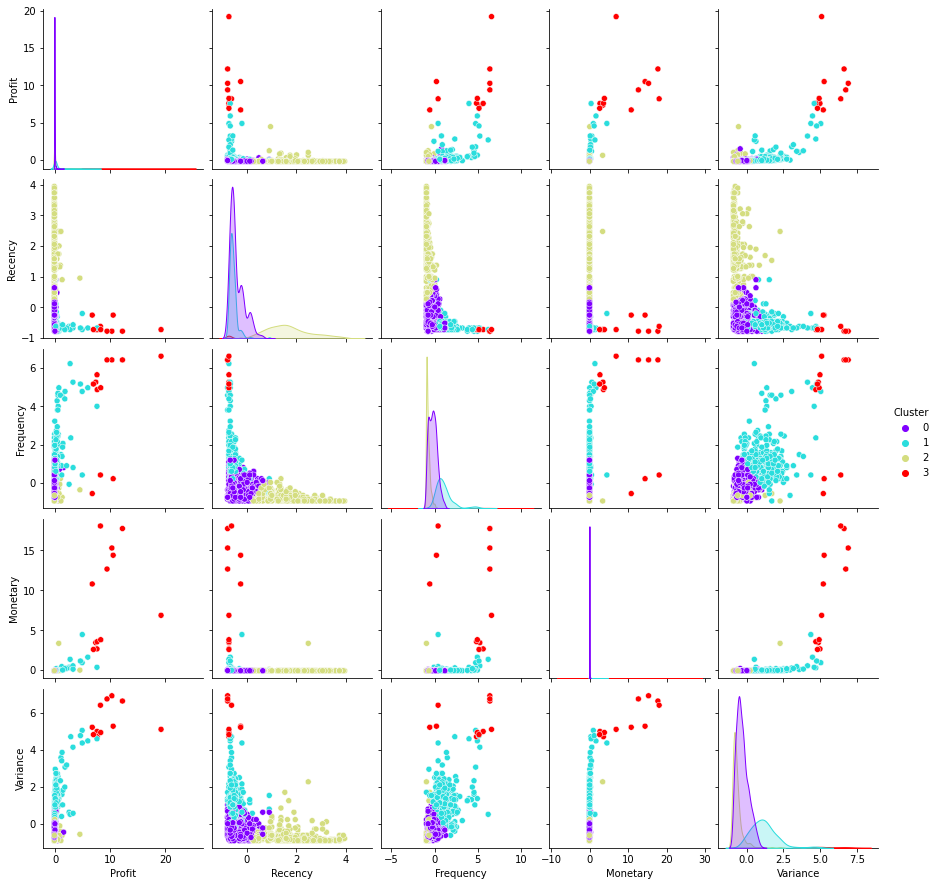

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans
kmeans.fit(df_feat)
y_predicted = kmeans.predict(df_feat)
df_feat['Cluster'] = y_predicted
sns.pairplot(df_feat,hue='Cluster',palette='rainbow')

In [31]:
df_feat['Cluster'].value_counts()

0    826
1    346
2    327
3     12
Name: Cluster, dtype: int64

Grupa 0 oraz 2 była wcześniej grupą 0.
 - Grupa 0 charakteryzuje się częstrzym zamiawianiem produktów, 
 - rożnorodość produktów jest wieksza
 - klienici przynosą trochę wieksze zyski firmie. 
    
